In [67]:
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
from common.trajectory_analysis import Trajectory
import matplotlib

lowpass_cutoff = 10 # Hz
dt = 0.005
A = np.array
pxtomm = 1/10.8
f = "..//data1//tracking am2 v2 e0.9 beta1.0  speed 19 2017-02-04 15-49-03.txt"
d = json.load(open(f))
d["filename"] = f
ts = [d["ts"][i] - d["ts"][0] for i in range(len(d["ts"]))]
tx = A(d["tx"]) * pxtomm
ty = A(d["ty"]) * pxtomm
cx = A(d["cx"]) * pxtomm
cy = A(d["cy"]) * pxtomm

t = Trajectory(tx, ty, ts, dt=dt, cut = [4, 1]).calc_betas()
c = Trajectory(cx, cy, ts, dt=dt, cut = [4, 1], smooth=lowpass_cutoff).calc_betas()

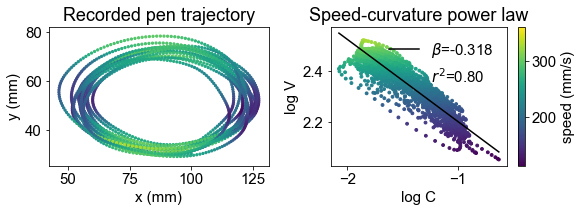

In [69]:

font = {'family' : 'Arial',
        'weight' : 'regular',
        'size'   : 15}

matplotlib.rc('font', **font)

vmin = np.min(c.V)
vmax = 360 #np.max(c.V) 400
cmap = "viridis"

f, [ax1, ax2] = plt.subplots(1,2, figsize=[8, 3.2])
step=1
im = ax1.scatter(c.x[::step], c.y[::step], c=c.V[::step], vmin=vmin, vmax=vmax, cmap=cmap, s= 5)
ax1.axis("equal")
ax1.set_xlabel("x (mm)")
ax1.set_ylabel("y (mm)")
ax1.set_title("Recorded pen trajectory")

ax2.scatter(c.logC, c.logV, c=c.V, vmin=vmin, vmax=vmax, cmap=cmap, s = 8)

x12 = np.array([np.min(c.logC), np.max(c.logC)])
y12 = c.betaCV * x12 + c.offsetCV 
ax2.plot(x12, y12, '-', color="black", label=r"$\beta$={:.3f}".format(c.betaCV))
ax2.plot([],[], color=(0,0,0,0), label="$r^2$={:.2f}".format(c.r2CV))
ax2.legend(loc="upper right", frameon=False)
ax2.set_title("Speed-curvature power law")
ax2.set_xlabel("log C")
ax2.set_ylabel("log V")

plt.tight_layout()
plt.colorbar(im, label="speed (mm/s)")
plt.savefig("..//figures/Figure 1A. Power law.pdf", format="pdf", bbox_inches="tight")

plt.show()


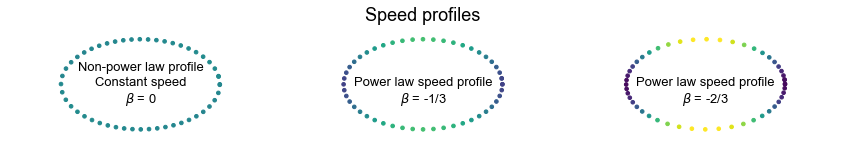

In [77]:
#Figure 2 A) Target speed profiles

radiusx, radiusy = 34.0, 19.3
f = 1.34
ts = np.arange(0, 1/f, 0.001)
xs = radiusx * np.cos(ts*f*np.pi*2)
ys = radiusy * np.sin(ts*f*np.pi*2)


tr = Trajectory(xs, ys, ts)
tr000 = tr.retrack(target_betaCV =  0, dt = 0.0311/2)
tr033 = tr.retrack(target_betaCV = -1/3, dt = 0.0311/2)
tr066 = tr.retrack(target_betaCV = -2/3, dt= 0.0311/2)

minv = vmin 
maxv = 360  

titles = ["Non-power law profile\nConstant speed" "\n" r"$\beta$ = 0", 
          r"Power law speed profile" "\n" r"$\beta$ = -1/3",
          r"Power law speed profile" "\n" r"$\beta$ = -2/3"]

fig, axes = plt.subplots(1,3, figsize=[12, 2.8])

plt.suptitle("Speed profiles", y=0.8, fontsize=18)
for i, tr in enumerate([tr000, tr033, tr066]):
    ax = axes[i] 
    ax.set_title(titles[i], y = 0.32, fontsize=13)
    im = ax.scatter(tr.x, tr.y, c=tr.V, vmin = minv, vmax = maxv,cmap="viridis", s = 13)
    ax.axis("Equal")
    ax.axis("off")

# right vertical
#cb_ax = fig.add_axes([0.915, 0.18, 0.008, 0.7])
#plt.colorbar(im, cax = cb_ax, label="speed (mm/s)")
#fig.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.savefig("..//figures/Figure 1 B. targets power law.pdf", format="pdf", bbox_inches="tight")
plt.show()

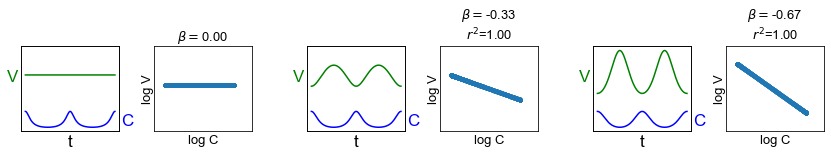

In [86]:
font = {'family' : 'Arial',
        'weight' : 'regular',
        'size'   : 17}

matplotlib.rc('font', **font)



tr = Trajectory(xs, ys, ts, dt = 0.0001)
tr000 = tr.retrack(target_betaCV =  0, dt = 0.0001)
tr033 = tr.retrack(target_betaCV = -1/3, dt = 0.001)
tr066 = tr.retrack(target_betaCV = -2/3, dt= 0.001)


fig, axes = plt.subplots(1,6, figsize=[12, 2.5])



for i, tr in enumerate([tr000, tr033, tr066]):
    tr.calc_betas()
    a = axes[i*2]
    a.plot(tr.t, tr.V, color="green")
    b = a.twinx()
    b.plot(tr.t, tr.C, color="blue")
    a.set_ylabel("V", color="green", rotation=0, labelpad=8, y = 0.55)
    b.set_ylabel("C", color="blue", rotation=0, labelpad=8, y=0.2)
    a.set_ylim(-100, 400)
    a.set_xlabel("t")
    a.set_xticks([])
    a.set_yticks([])
    b.set_yticks([])
    b.set_ylim(0, 0.4)
    
    
    
    c = axes[i*2+1]
    c.set_xticks([])
    c.set_yticks([])
    
    if i == 0:
        beta = fr"$\beta=${abs(tr.betaCV):.2f}"
    else:
        beta = fr"$\beta=${tr.betaCV:.2f}" "\n" fr"$r^2$={tr.r2CV:.2f}"
    
    c.plot(tr.logC, tr.logV, '.', label=beta)
    c.set_title(beta , fontsize=13)
    c.set_ylim(1.9, 2.75)
    c.set_xlim(-1.9, -0.85)
    c.set_xlabel("log C", fontsize=13)
    c.set_ylabel("log V", fontsize=13,labelpad=0)
    
plt.tight_layout()

for c in axes[1::2]:
    box = c.get_position()
    box.x0 += -0.012
    box.x1 += -0.012
    c.set_position(box)

plt.savefig("..//figures/Figure 1 C.pdf", format="pdf", bbox_inches="tight")
plt.show()